<div align="left">
<img align="left" src="../misc/site-logo.png" >
<div> <b> 2018 Data Science Bowl </b> </div>
<div> Pedro D. Marrero Fernandez</div>
<div> https://www.kaggle.com/c/data-science-bowl-2018/discussion/47770 </div>
<div> :), :(, :/</div>
</div>     

In [1]:
import os
import sys
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import csv
from skimage import color
import scipy.misc
import scipy.ndimage as ndi

sys.path.append('..')
from torchlib.datasets import imageutl as imutl
from torchlib.datasets import utility as utl
from torchlib import visualization as view


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

# Load dataset

In [2]:
def summary(x):
    print( np.min(x), np.max(x), x.shape )

def imageshowlist(image_in, image_out):
    plt.figure( figsize=(16,16))
    plt.subplot(121)
    plt.imshow( image_in )
    plt.axis('off')
    plt.subplot(122)
    plt.imshow( image_out )
    plt.axis('off')
    
def tolabel(mask):
    labeled, nr_true = ndi.label(mask)
    return labeled

def decompose(labeled):
    nr_true = labeled.max()
    masks = []
    for i in range(1, nr_true + 1):
        msk = labeled.copy()
        msk[msk != i] = 0.
        msk[msk == i] = 255.
        masks.append(msk)
    if not masks: return np.array([labeled])
    else: return np.array(masks)


In [4]:
pathdataset     = '../db/dbselect'
namedataset     = 'kt001'
sub_folder      =  ''
folders_images  = 'images'
folders_labels  = 'labels'


pathname = os.path.join(pathdataset, namedataset);
dataloader = imutl.ctechProvide.create(
    pathname, 
    sub_folder, 
    folders_images, 
    folders_labels,
    )

print(len(dataloader))
print(':)!!!')

13
:)!!!


0 255 (1024, 1024)
0 1 (1024, 1024)


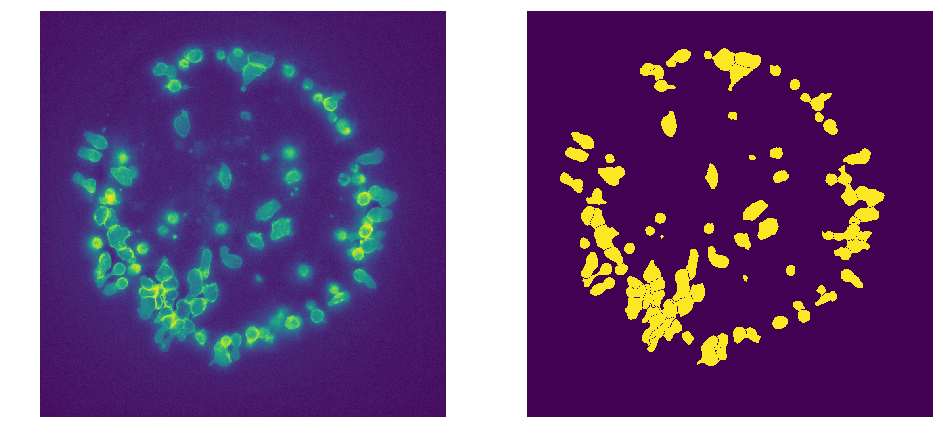

In [5]:
image, label = dataloader[ np.random.randint( len(dataloader) ) ]
summary(image)
summary(label)
imageshowlist(image, label)

002.tif


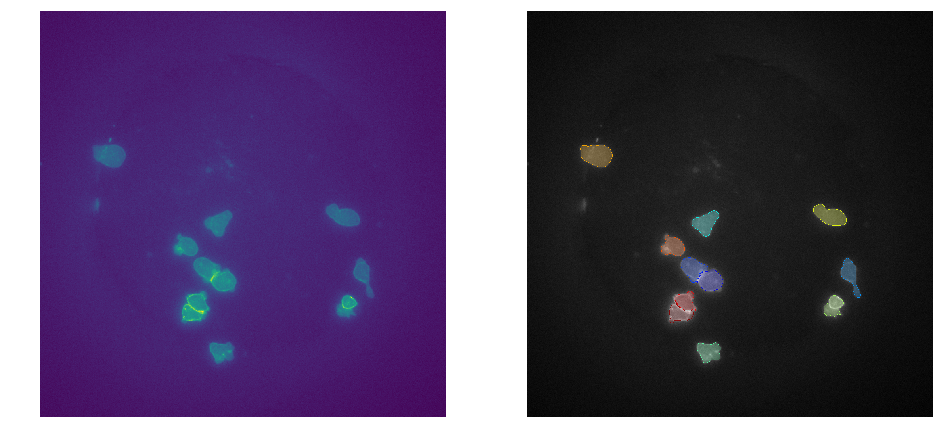

In [8]:
i = 1
image, label = dataloader[ i ] #np.random.randint( len(dataloader) )
label = decompose(tolabel(label)).transpose( (1,2,0) )

label = label[:,:, np.random.permutation(label.shape[2]) ]
label = view.makeimagecell(image, label, alphaback=0.2, alphaedge=0.9)

print( dataloader.getid() )
imageshowlist(image, label)



### Tool annotation 

- https://en.wikipedia.org/wiki/List_of_manual_image_annotation_tools
- https://github.com/labelbox/Labelbox/  ****
- https://github.com/wkentaro/labelme


### Datasets 



